# Dataset
- **Lohoff et al., 2020**
- 8-12 somite stage mouse embryo tissue sections
- Preprocessed

In [3]:
import scanpy as sc
import squidpy as sq

import numpy as np

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8
squidpy==1.2.3


First, let’s visualize cluster annotation in spatial context with squidpy.pl.spatial_scatter().

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


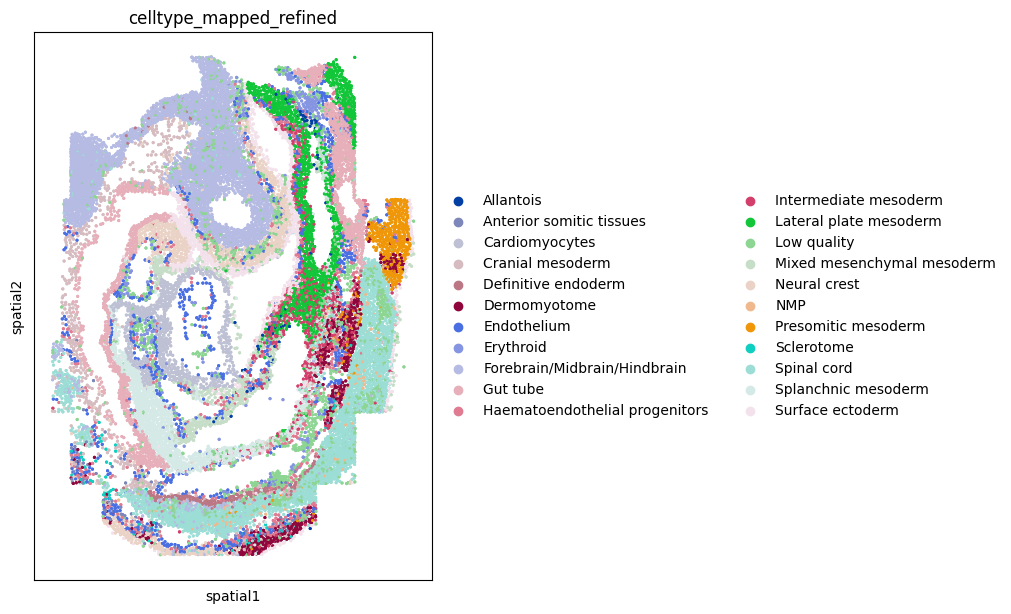

In [36]:
sq.pl.spatial_scatter(adata,color="celltype_mapped_refined", shape=None, figsize=(10, 10))

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


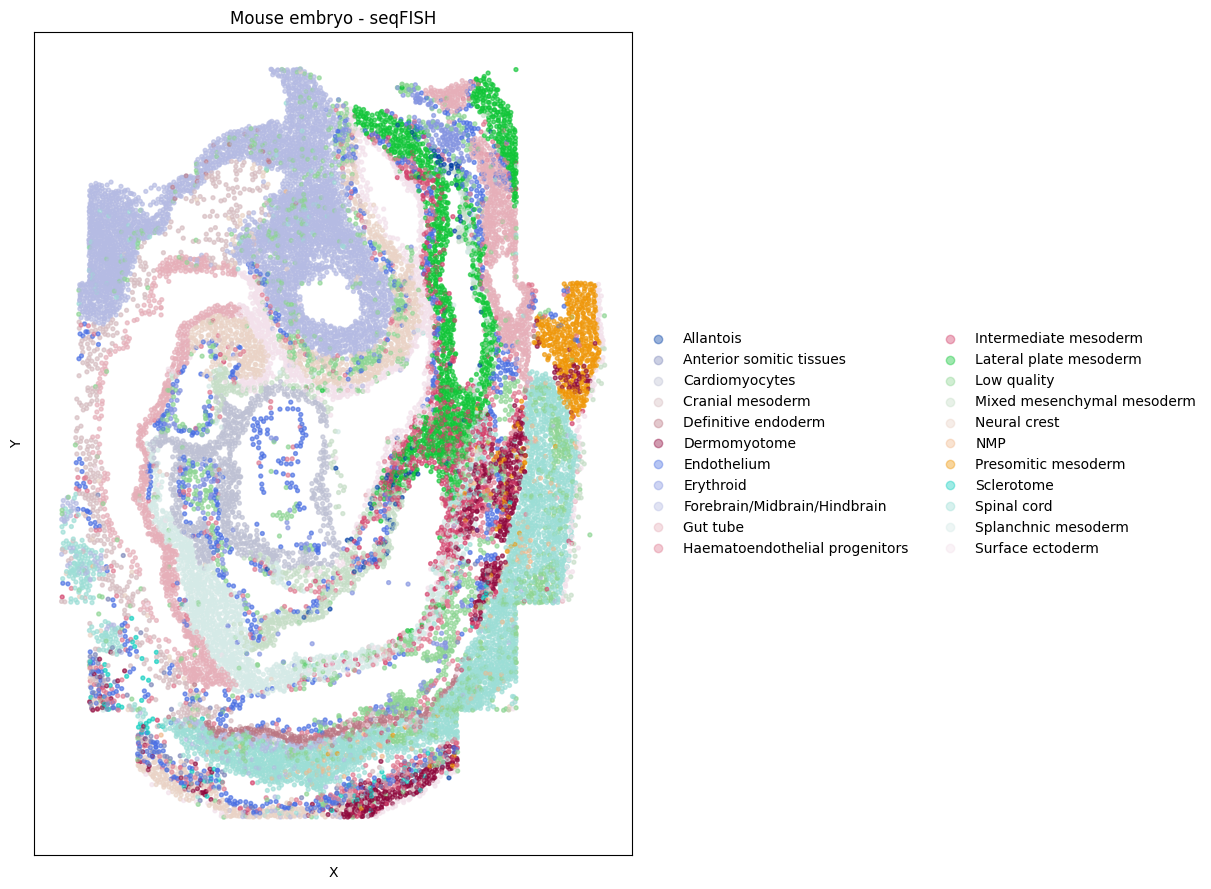

In [67]:
sq.pl.spatial_scatter(adata,
                      color="celltype_mapped_refined",
                      shape=None,
                      figsize=(12, 12),
                      title="Mouse embryo - seqFISH",
                      axis_label=["X", "Y"],
                      alpha=0.4,
                      size=30)

# Neighborhood enrichment analysis

Similar to other spatial data, we can investigate spatial organization of clusters in a quantitative way, by computing a neighborhood enrichment score. You can compute such score with the following function: squidpy.gr.nhood_enrichment(). In short, it’s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being enriched. On the other hand, if they are far apart, the score will be low and they can be defined as depleted. This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).

Since the function works on a connectivity matrix, we need to compute that as well. This can be done with squidpy.gr.spatial_neighbors(). Please see Building spatial neighbors graph for more details of how this function works.

Finally, we’ll directly visualize the results with squidpy.pl.nhood_enrichment(). We’ll add a dendrogram to the heatmap computed with linkage method ward.

  0%|          | 0/1000 [00:00<?, ?/s]

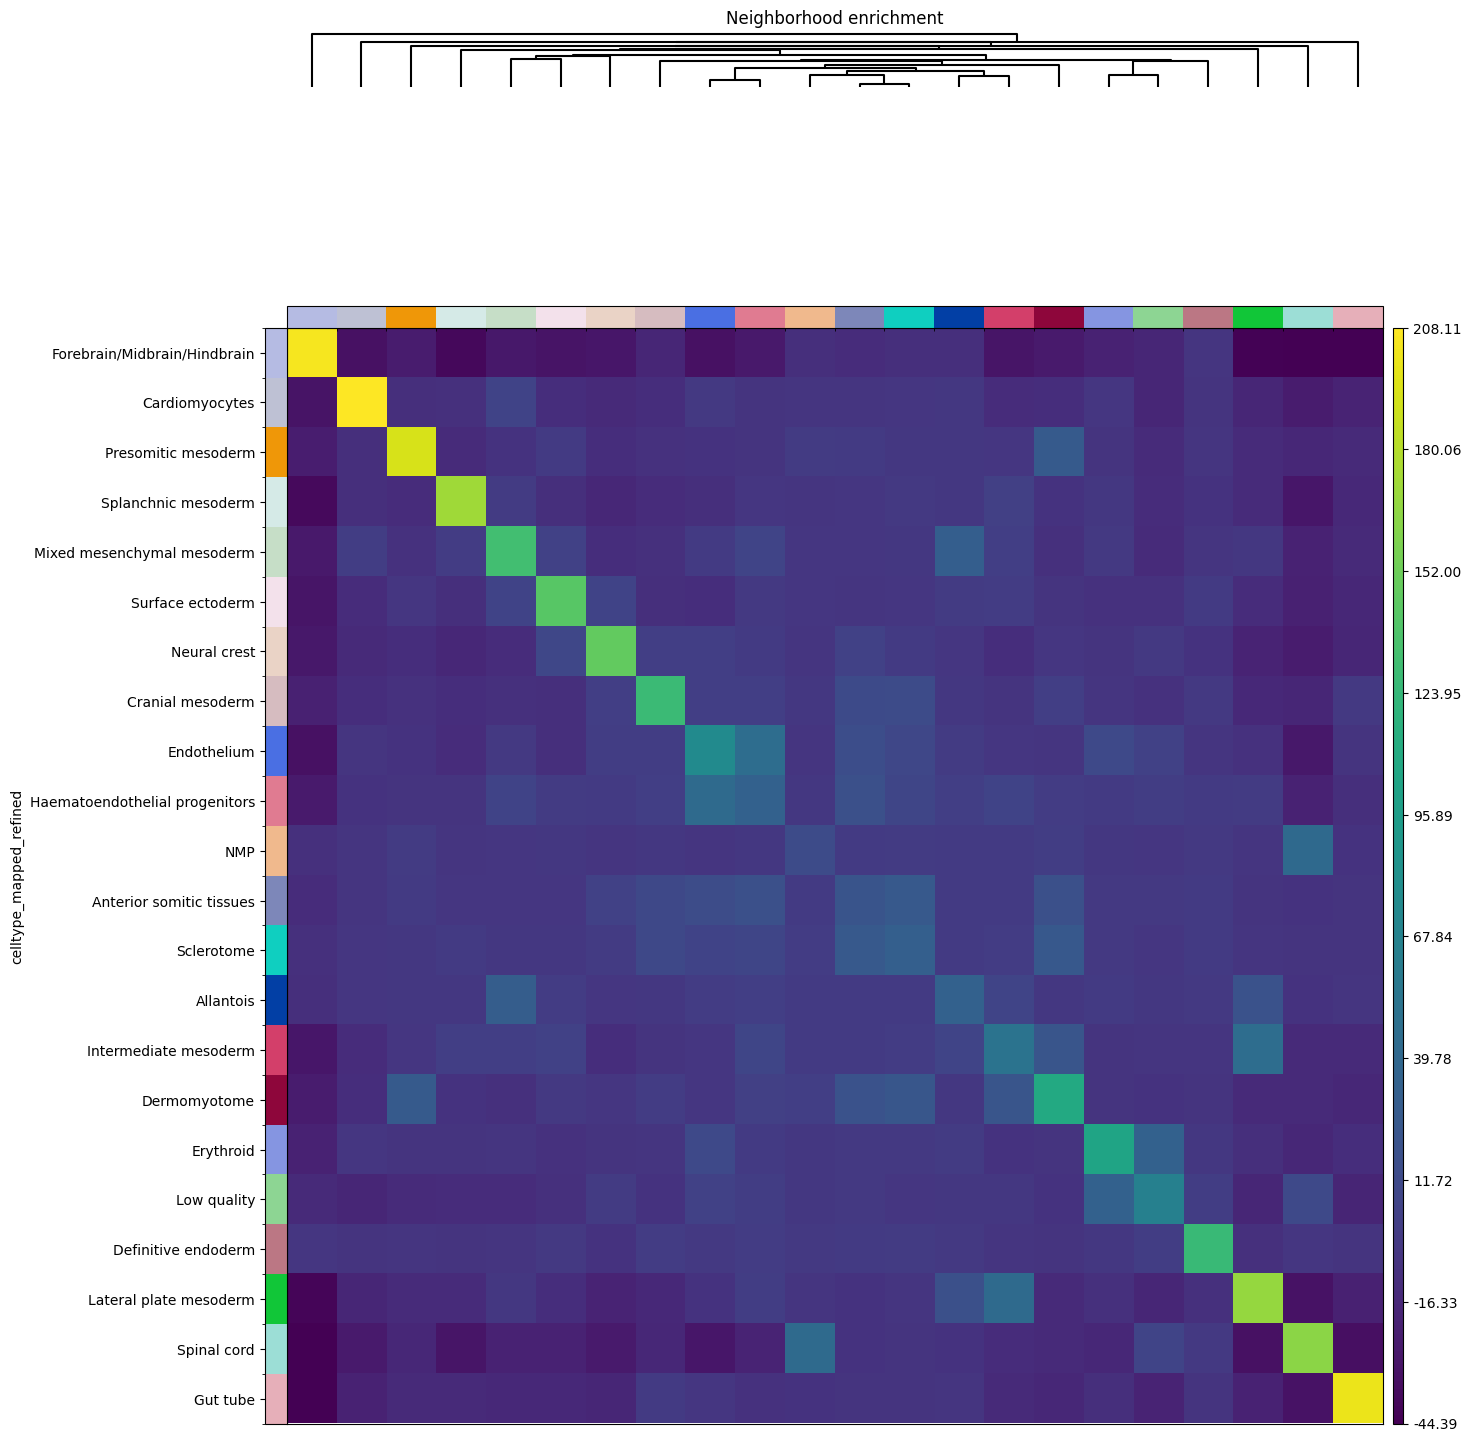

In [27]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")